<h1>Project #3 TSP Ant Colony Optimization</h1>
<h5>Course: CAP4630 001<h5>
<h5>Date: 6/24/2023<h5>
<h5>Team Members: Adam Clark, Mahmood Sakib, Quang Le</h5>

<h3>Team Roles</h3>
<body>
<p>
<ul>

<li>Adam Clark - Reporter</li>

<li>Mahmood Sakib - Architecture</li>

<li>Quang Le - Developer</li>
</ul>
</p>
</body>

<h3>Google Colab</h3>
N/A
<h3>GitHub Repo</h3>
N/A 

<h3>Overview</h3>

<body>
The Traveling Salesman Problem (TSP) involves identifying the shortest possible route that passes through a list of cities and returns to the point of origin. It's a complex problem with no known efficient solution, referred to as NP-hard, implying that no known solution exists that can be calculated in polynomial time. Nevertheless, there are approximation algorithms such as Ant Colony Optimization (ACO) and Genetic Algorithm, which can determine solutions close to the optimal one. In this project, we'll apply the ACO algorithm to tackle the TSP issue. ACO is a metaheuristic (high-level problem-solving strategies that guide the exploration and exploitation of search spaces to uncover near-optimal solutions) inspired by the behaviour of ants searching for food. Ants in nature deposit pheromones while searching for food, and these pheromone trails guide other ants to the food source. In the ACO algorithm, artificial 'ants' traverse the problem space and modify it according to simple rules designed to guide subsequent ants toward promising solutions.

The essential steps of the ACO are as follows:

1. Initialization of Pheromone Trails: Create the idea of pheromone trails connecting the various attractions or cities, and initialize their intensity values.
2. Establishment of Ant Population: Generate a population of artificial ants. Each ant begins its journey at a different attraction.
3. Next Visit Selection for Each Ant: Determine the next attraction that each ant will visit. Continue this process until each ant has made a single visit to all attractions.
4. Pheromone Trail Update: Based on the movements of the ants, update the intensity of the pheromone trails. Take into account the evaporation of pheromones over time, which simulates the natural dissipation of these chemical markers.
5. Best Solution Update: From the total distances traveled by each ant, update the best solution. The best solution is typically the one with the shortest total distance.
6. Definition of Stopping Criteria: The procedure of ants visiting attractions is repeated for several iterations, with one iteration defined as every ant visiting all attractions once. The stopping criterion determines the total number of iterations to run. Allowing more iterations provides the ants with more opportunities to make better-informed decisions based on the evolving pheromone trails.
<body>

<h3>Preqrequisites</h3>
<body>
Installing matplotlib for graphing the results:
</body>

```python
pip install matplotlib
```

<h3>How were the cities and distances represented (as a data structure)?</h3>

<body>
<p>
 The cities are represented using a dictionary data structure where the keys represent the city numbers and the values are tuples containing the x and y coordinates of each city. This representation allows easy access to the coordinates of a city for distance calculation. Furthermore the distance are calculated using the distance formula square root of (x2-x1)^2 + (y2-y1)^2 which is use in calculate_total_distance function to calculate the total distance of the path.
</p>


</body>

<h3>Contribution</h3>
<ul>
<p>
Solution and Data Structure proposed by Mahmood Sakib
</p>
<p>
Implementation was done by Adam Clark with the assistance of Quang Le
</p>
<ul>

In [3]:
import random
import math

# Function to generate a set of cities with random coordinates
def generate_cities(n=5, width=200, height=200):
    random.seed(1)  # Seed the random number generator for consistent results
    cities = {}  # Initialize an empty dictionary to store the city coordinates
    for i in range(n):  # For each city
        x = random.uniform(0, width)  # Generate a random x-coordinate
        y = random.uniform(0, height)  # Generate a random y-coordinate
        cities[i] = (int(x), int(y))  # Store the coordinates in the dictionary
    random.seed()  # Reset the random number generator
    return cities  # Return the dictionary of city coordinates

# Function to calculate the distance between two cities using the Euclidean distance formula
def calculate_distance(cityA, cityB):
    xDis = abs(cityA[0] - cityB[0])  # Calculate the difference in x-coordinates
    yDis = abs(cityA[1] - cityB[1])  # Calculate the difference in y-coordinates
    return math.sqrt((xDis**2) + (yDis**2))  # Calculate and return the Euclidean distance

# Function to calculate the total distance of a route
def calculate_total_distance(route, cities):
    total_distance = 0  # Initialize the total distance
    for i in range(len(route) - 1):  # For each pair of cities in the route
        total_distance += calculate_distance(cities[route[i]], cities[route[i + 1]])  # Add the distance between the pair of cities to the total distance   
    total_distance += calculate_distance(cities[route[-1]], cities[route[0]])  # Add the distance from the last city to the first city
    return total_distance  # Return the total distance

<h3>How did you encode the solution space?</h3>

<body>
The solution space was represented as a list of city names (integers), where each list represented a route taken by an ant. The order of the city names in the list defined the order of the cities visited in the route.
</body>
<h3>How did you handle the creation of the initial ant population?</h3>
<body>
Each ant was initialized with a random starting city, and then it would construct a route by probabilistically choosing the next city to visit based on the pheromone levels and the inverse of the distance to the unvisited cities.


</body>

<h3>Contribution</h3>
<ul>
<p>
Solution and algorithm proposed by Mahmood Sakib
</p>
<p>
Implementation was done by Adam Clark with the assistance of Quang Le
</p>
<ul>

In [4]:
# Function to create a route for an ant
def create_route(cities, pheromones, alpha, beta):

    start_city = random.choice(list(cities.keys()))  # Choose a random city as the start city 
    cities_left = list(cities.keys())  # Create a list of all the cities  
    cities_left.remove(start_city)  # Remove the start city from the list of cities left to visit
    route = [start_city]  # Initialize the route with the start city

    while cities_left:  # While there are cities left to visit
        current_city = route[-1]  # The current city is the last city in the route
        probabilities = []  # Initialize an empty list to store the probabilities
        for next_city in cities_left:  # For each city left to visit
            # Calculate the probability of moving to the next city based on the pheromone level and the inverse of the distance
            probabilities.append(pheromones[current_city][next_city] ** alpha * (1 / calculate_distance(cities[current_city], cities[next_city])) ** beta)
        total = sum(probabilities)  # Calculate the total of the probabilities
        # Initialize an empty list for the normalized probabilities
        normalized_probabilities = []

        # Iterate over each probability in the probabilities list
        for prob in probabilities:
            # Normalize the probability and add it to the list
            normalized_probabilities.append(prob / total)

        # Assign the normalized probabilities back to the probabilities variable
        probabilities = normalized_probabilities
        next_city = random.choices(cities_left, probabilities)[0]  # Choose the next city based on the probabilities
        cities_left.remove(next_city)  # Remove the chosen city from the list of cities left to visit
        route.append(next_city)  # Add the chosen city to the route

    return route  # Return the route 

<h3>How did you handle the updating of the pheromone trails?</h3>
<body>
The pheromones matrix was updated by decaying the existing pheromone levels and then adding pheromones to the paths used in the best route. The amount of pheromones added was based on the inverse of the best distance.

The pheromone trails are updated in two stages: evaporation and intensification.

1. Evaporation: In the evaporation stage, a certain percentage (defined by the evaporation rate or decay factor) of the pheromone on each edge evaporates to simulate the natural evaporation of pheromones. This is done by multiplying the pheromone value on each edge by (1 - decay factor).

2. Intensification: In the intensification stage, pheromones are added to the edges that were part of the best tours found in the current iteration (or all tours depending on the update rule used). The amount of pheromone added is usually proportional to the quality of the tour, i.e., 1 / tour length.

After a few trial run we notice that some of the best route distance would have low pheromone level and would not be selected by the ants. To solve this problem we implemented a elitism in the pheromone update where the best route would recieve extra pheromone than the rest of the routes. This would allow the ants to select the best route more often and would allow the algorithm to converge faster. The idea was inspire (Rochak Gupta) implementation of elitism.
</body>
<h3>Contribution</h3>
<ul>
<p>
Algorithm proposed by Adam Clark
</p>
<p>
Implementation was done by Sakib Mahmood
</p>
<ul>

In [5]:
# Function to update the pheromones on the paths
def update_pheromones(pheromones, best_route, best_distance, decay):
    for i in range(len(pheromones)):  # For each row in the pheromones matrix
        for j in range(len(pheromones[i])):  # For each element in the row
            pheromones[i][j] = (1 - decay) * pheromones[i][j]  # Decay the pheromone level

    for i in range(len(best_route) - 1):  # For each pair of cities in the best route
        city = best_route[i]  # The current city is the first city in the pair
        next_city = best_route[i + 1]  # The next city is the second city in the pair
        # Add pheromones to the path from the current city to the next city and from the next city to the current city based on the inverse of the best distance
        pheromones[city][next_city] += 1 / best_distance
        pheromones[next_city][city] += 1 / best_distance

    # Add pheromones to the path from the last city in the best route to the first city and from the first city to the last city based on the inverse of the best distance
    city = best_route[-1]
    next_city = best_route[0]
    pheromones[city][next_city] += 1 / best_distance
    pheromones[next_city][city] += 1 / best_distance

    return pheromones  # Return the updated pheromones matri
  
# Function to apply elitism by adding pheromones to the paths used in the best routes
def apply_elitism(all_routes, cities, elitism_factor, pheromones):
    all_routes.sort(key=lambda route: calculate_total_distance(route, cities))  # Sort the routes by their total distances

    n_elite_routes = int(elitism_factor * len(all_routes))  # Calculate the number of elite routes

    for i in range(n_elite_routes):  # For each elite route
        route = all_routes[i]  # Get the route
        distance = calculate_total_distance(route, cities)  # Calculate the total distance of the route
        for j in range(len(route) - 1):  # For each pair of cities in the route
            city = route[j]  # The current city is the first city in the pair
            next_city = route[j + 1]  # The next city is the second city in the pair
            # Add pheromones to the path from the current city to the next city and from the next city to the current city based on the inverse of the distance
            pheromones[city][next_city] += 1 / distance
            pheromones[next_city][city] += 1 / distance

    # Add pheromones to the path from the last city in the route to the first city and from the first city to the last city based on the inverse of the distance
    city = route[-1]
    next_city = route[0]
    pheromones[city][next_city] += 1 / distance
    pheromones[next_city][city] += 1 / distance

    return pheromones  # Return the updated pheromones matrix

<h3>Which strategy(ies) did you use to compute the best solution?</h3>
<body>
The best solution (route) was computed by keeping track of the route with the shortest total distance throughout all the iterations.
</body>

<h3>Which stopping condition did you use? Why?</h3>
<body>
The stopping condition used was a fixed number of iterations (epochs). This was used because the performance of the algorithm can vary significantly with the number of iterations, and a fixed number allows for easy comparison of different configurations.
</body>

</body>
<h3>Contribution</h3>
<ul>
<p>
Algorithm proposed by Adam Clark
</p>
<p>
Implementation was done by Quang Le
</p>
<ul>

In [6]:
# Function to solve the traveling salesman problem using the ant colony optimization algorithm
def solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor):
    n_cities = len(cities)  # Get the number of cities
    pheromones = []  # Initialize empty list for pheromones

    # Outer loop for number of cities
    for i in range(n_cities):
        row = []  # Initialize empty list for current row
        # Inner loop for number of cities
        for j in range(n_cities):
            row.append(1)  # Add 1 to current row
        pheromones.append(row)  # Add current row to pheromones


    best_route = []  # Initialize the best route
    best_distance = math.inf  # Initialize the best distance as infinity

    for iteration in range(epoch):  # For each iteration
        all_routes = []  # Initialize an empty list to store the routes
        for ant in range(n_ants):  # For each ant
            route = create_route(cities, pheromones, alpha, beta)  # Create a route for the ant 
            all_routes.append(route)  # Add the route to the list of routes

        for route in all_routes:  # For each route
            total_distance = calculate_total_distance(route, cities)  # Calculate the total distance of the route
            if total_distance < best_distance:  # If the total distance is less than the best distance
                best_distance = total_distance  # Update the best distance
                best_route = route  # Update the best route

        # Update the pheromones matrix with the pheromones from the best routes and decay the existing pheromones
        pheromones = apply_elitism(all_routes, cities, elitism_factor, pheromones)
        pheromones = update_pheromones(pheromones, best_route, best_distance, decay)
        print(f'Epoch {iteration + 1}: Best distance = {best_distance} Best route = {best_route}')  # Print the best distance and best route for this iteration

    return best_route, best_distance  # Return the best route and best distance

<h3>What other parameters, design choices, initialization and configuration steps are relevant to your design and implementation?</h3>
<body>
Several other parameters and design choices were made:

1. <b>n_cities</b>-the number of cities, which determines the size of the problem.
2. <b>n_ants</b>-the number of ants, which can influence the amount of exploration done in the solution space.
3. <b>epochs</b>- determines how many times the ants visit all the cities.
4. <b>decay</b> -the decay factor, which determines how quickly the pheromones evaporate.
5. <b>alpha and beta</b>-parameters, which control the relative importance of the pheromone level and the inverse distance, respectively, in the decision-making process of the ants.
6. <b>elitism_factor</b>-the elitism factor, which determines how many of the best routes add pheromones to the paths they used.
</body>

<h3>Contribution</h3>
<ul>
Program design was done by Adam Clark
</p>
<p>
Implementation was done by Quang Le
</p>
<ul>

In [7]:

if __name__ == '__main__':
    # Define the parameters for the algorithm
    n_cities = 25
    n_ants = 50
    epoch = 100
    decay = 0.1
    alpha = 1
    beta = 1
    elitism_factor = 0.1

    # Generate the cities
    cities = generate_cities(n_cities)

    # Solve the traveling salesman problem using the ant colony optimization algorithm
    best_route, best_distance = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)

    # Print the best route and best distance
    print(f'Best route: {best_route}')
    print(f'Best distance: {best_distance}')

Epoch 1: Best distance = 1714.3209856909712 Best route = [19, 12, 21, 13, 1, 23, 9, 6, 14, 15, 16, 8, 0, 2, 7, 24, 11, 5, 18, 22, 3, 20, 10, 4, 17]
Epoch 2: Best distance = 1639.252083642963 Best route = [7, 14, 21, 9, 11, 23, 18, 24, 22, 20, 3, 8, 0, 15, 16, 12, 2, 1, 19, 5, 10, 13, 4, 17, 6]
Epoch 3: Best distance = 1639.252083642963 Best route = [7, 14, 21, 9, 11, 23, 18, 24, 22, 20, 3, 8, 0, 15, 16, 12, 2, 1, 19, 5, 10, 13, 4, 17, 6]
Epoch 4: Best distance = 1639.252083642963 Best route = [7, 14, 21, 9, 11, 23, 18, 24, 22, 20, 3, 8, 0, 15, 16, 12, 2, 1, 19, 5, 10, 13, 4, 17, 6]
Epoch 5: Best distance = 1542.465407425972 Best route = [3, 22, 24, 19, 1, 9, 4, 17, 21, 13, 15, 16, 12, 5, 6, 11, 18, 20, 23, 2, 14, 8, 0, 10, 7]
Epoch 6: Best distance = 1542.465407425972 Best route = [3, 22, 24, 19, 1, 9, 4, 17, 21, 13, 15, 16, 12, 5, 6, 11, 18, 20, 23, 2, 14, 8, 0, 10, 7]
Epoch 7: Best distance = 1542.465407425972 Best route = [3, 22, 24, 19, 1, 9, 4, 17, 21, 13, 15, 16, 12, 5, 6, 11, 18

<h3>Which (simple) experiments have you run to observe the impact of different design decisions and parameter values?</h3>

Number of Cities: Increasing the number of cities increases the execution time as well as the best distance achieved. As the problem's complexity (number of cities) increases, the algorithm requires more computational power and time to find a good solution.

Number of Ants: Increasing the number of ants improves the quality of the solution (lower best distance), but also increases the execution time. More ants allow for more diverse exploration of the search space, improving the likelihood of finding better solutions, but at the cost of increased computation.

Decay Factor: Modifying the decay factor seems to influence both the best distance and execution time. It appears that a decay factor around 0.1 to 0.2 yields the best distance. This indicates that the amount of pheromone evaporation can significantly impact the performance of the algorithm.

Elitism Factor: The variation of the elitism factor, which controls the influence of the best-performing ant in the pheromone update, shows a noticeable effect on the best distance, with a value around 0.1 providing the best result in this experiment.

Alpha and Beta Parameters: Changing the relative importance of pheromone trails (alpha) and heuristic information (beta) affects the best distance and execution time. It appears that equal values (alpha: 1, beta: 1) or higher importance on heuristic information (alpha: 1, beta: 2) produce the best results in this case.

These experiments illustrate how different design decisions and parameter choices can affect the performance of the Ant Colony Optimization algorithm on the Travelling Salesman Problem. Such experimentation helps in understanding the balance between the quality of the solution and computational cost, and guides in fine-tuning the parameters for specific problem instances.

<h3>Contribution</h3>
<ul>
<p>
Experiement propose by Adam Clark and Sakib Mahmood
</p>
<p>
Implementation was done by Quang Le and Adam Clark
</p>
<ul>


In [8]:
import time

# UPDATED so it wont print out the best route and best distance for each epoch
def solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor):
    n_cities = len(cities)  # Get the number of cities
    pheromones = []  # Initialize empty list for pheromones

    # Outer loop for number of cities
    for i in range(n_cities):
        row = []  # Initialize empty list for current row
        # Inner loop for number of cities
        for j in range(n_cities):
            row.append(1)  # Add 1 to current row
        pheromones.append(row)  # Add current row to pheromones


    best_route = []  # Initialize the best route
    best_distance = math.inf  # Initialize the best distance as infinity

    for iteration in range(epoch):  # For each iteration
        all_routes = []  # Initialize an empty list to store the routes
        for ant in range(n_ants):  # For each ant
            route = create_route(cities, pheromones, alpha, beta)  # Create a route for the ant 
            all_routes.append(route)  # Add the route to the list of routes

        for route in all_routes:  # For each route
            total_distance = calculate_total_distance(route, cities)  # Calculate the total distance of the route
            if total_distance < best_distance:  # If the total distance is less than the best distance
                best_distance = total_distance  # Update the best distance
                best_route = route  # Update the best route

        # Update the pheromones matrix with the pheromones from the best routes and decay the existing pheromones
        pheromones = apply_elitism(all_routes, cities, elitism_factor, pheromones)
        pheromones = update_pheromones(pheromones, best_route, best_distance, decay)

    return best_route, best_distance  # Return the best route and best distance

def main():

    n_ants = 50
    epoch = 100
    decay = 0.1
    alpha = 1
    beta = 1
    elitism_factor = 0.1

    # 1. Vary the number of cities
    for n_cities in [10, 20, 50]:
        cities = generate_cities(n_cities)
        start = time.time()
        best_route, best_distance = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)
        end = time.time()
        print(f"Number of cities: {n_cities}, Best distance: {best_distance}, Execution time: {end - start}")

    n_cities = 25

    # 2. Vary the number of ants
    for n_ants in [10, 20, 50, 100, 200]:
        cities = generate_cities(n_cities)
        start = time.time()
        best_route, best_distance = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)
        end = time.time()
        print(f"Number of ants: {n_ants}, Best distance: {best_distance}, Execution time: {end - start}")

    # 3. Vary the decay factor
    for decay in [0.05, 0.1, 0.2, 0.5, 0.8]:
        cities = generate_cities(n_cities)
        start = time.time()
        best_route, best_distance = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)
        end = time.time()
        print(f"Decay factor: {decay}, Best distance: {best_distance}, Execution time: {end - start}")

    # 4. Vary the elitism factor
    for elitism_factor in [0.05, 0.1, 0.2, 0.5, 0.8]:
        cities = generate_cities(n_cities)
        start = time.time()
        best_route, best_distance = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)
        end = time.time()
        print(f"Elitism factor: {elitism_factor}, Best distance: {best_distance}, Execution time: {end - start}")

    # 5. Vary the alpha and beta parameters
    for alpha, beta in [(0.5, 0.5), (1, 1), (2, 1), (1, 2), (2, 2)]:
        cities = generate_cities(n_cities)
        start = time.time()
        best_route, best_distance = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)
        end = time.time()
        print(f"Alpha: {alpha}, Beta: {beta}, Best distance: {best_distance}, Execution time: {end - start}")


if __name__ == "__main__":
    main()


Number of cities: 10, Best distance: 692.3969749697926, Execution time: 0.3822364807128906
Number of cities: 20, Best distance: 825.7308993845752, Execution time: 1.1802732944488525
Number of cities: 50, Best distance: 1464.8923973562269, Execution time: 6.668242931365967
Number of ants: 10, Best distance: 1121.8838795104748, Execution time: 0.34207940101623535
Number of ants: 20, Best distance: 1055.164779991448, Execution time: 0.7221629619598389
Number of ants: 50, Best distance: 974.5102730095466, Execution time: 1.7741007804870605
Number of ants: 100, Best distance: 943.9751716379412, Execution time: 4.093024015426636
Number of ants: 200, Best distance: 937.3553725857529, Execution time: 7.492801189422607
Decay factor: 0.05, Best distance: 1035.5093409373742, Execution time: 7.716768980026245
Decay factor: 0.1, Best distance: 937.3553725857529, Execution time: 7.272608041763306
Decay factor: 0.2, Best distance: 937.3553725857528, Execution time: 7.53455376625061
Decay factor: 0.5,

Cities: 25 , n_ants: 50, epoch: 100, decay: 0.1, alpha: 1, beta: 1, elitism_factor: 0.1


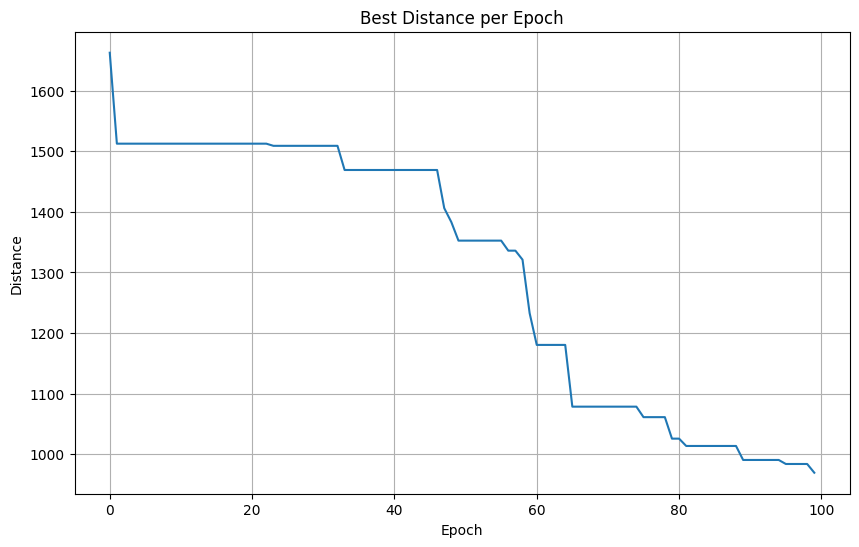

Best route: [20, 24, 18, 11, 23, 5, 1, 9, 6, 19, 2, 14, 21, 13, 4, 17, 15, 12, 16, 10, 0, 8, 7, 3, 22]
Best distance: 969.6637528246673


In [14]:
import matplotlib.pyplot as plt

#updated function to work with matplotlib
def solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor):
    n_cities = len(cities)  
    pheromones = []  

    for i in range(n_cities):
        row = []  
        for j in range(n_cities):
            row.append(1)  
        pheromones.append(row) 

    best_route = []  
    best_distance = math.inf
    best_distances = []  # List to store best distances for each epoch

    for iteration in range(epoch):  
        all_routes = []  
        for ant in range(n_ants):  
            route = create_route(cities, pheromones, alpha, beta) 
            all_routes.append(route)  

        for route in all_routes:  
            total_distance = calculate_total_distance(route, cities)  
            if total_distance < best_distance: 
                best_distance = total_distance 
                best_route = route  

        best_distances.append(best_distance)  # Append best distance of this epoch to list

        pheromones = apply_elitism(all_routes, cities, elitism_factor, pheromones)
        pheromones = update_pheromones(pheromones, best_route, best_distance, decay)

    # Plotting the distances
    plt.figure(figsize=(10, 6))
    plt.plot(best_distances)
    plt.title('Best Distance per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()

    return best_route, best_distance  


if __name__ == '__main__':
    # Define the parameters for the algorithm
    n_cities = 25
    n_ants = 50
    epoch = 100
    decay = 0.1
    alpha = 1
    beta = 1
    elitism_factor = 0.1

    # Generate the cities
    cities = generate_cities(n_cities)
    print(f'Cities: {n_cities} , n_ants: {n_ants}, epoch: {epoch}, decay: {decay}, alpha: {alpha}, beta: {beta}, elitism_factor: {elitism_factor}')
    # Solve the traveling salesman problem using the ant colony optimization algorithm
    best_route, best_distance = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)

    # Print the best route and best distance
    print(f'Best route: {best_route}')
    print(f'Best distance: {best_distance}')

Cities: 25 , n_ants: 100, epoch: 100, decay: 0.1, alpha: 1, beta: 1, elitism_factor: 0.1


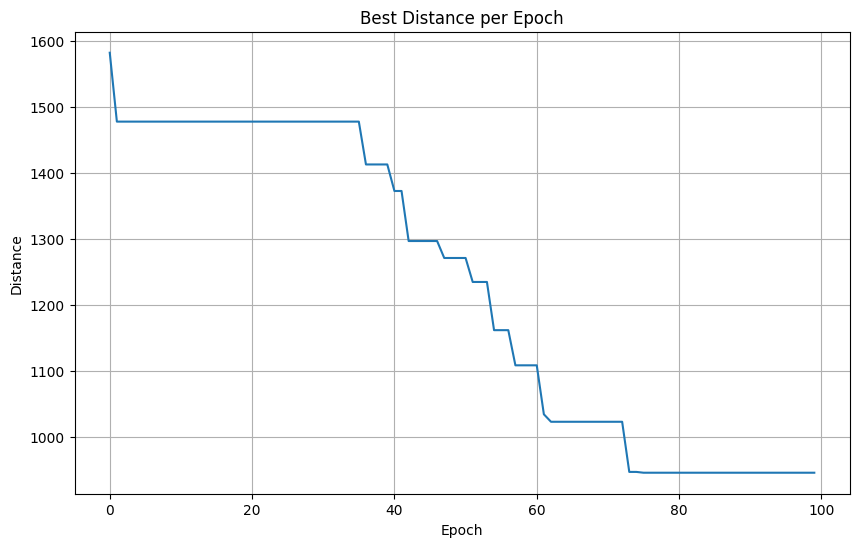

Best route: [5, 18, 24, 20, 22, 3, 7, 8, 0, 10, 21, 13, 4, 17, 15, 12, 16, 14, 2, 1, 19, 6, 9, 11, 23]
Best distance: 945.1528899335901


In [15]:
if __name__ == '__main__':
    # Define the parameters for the algorithm
    n_cities = 25
    n_ants = 100
    epoch = 100
    decay = 0.1
    alpha = 1
    beta = 1
    elitism_factor = 0.1

    # Generate the cities
    cities = generate_cities(n_cities)
    print(f'Cities: {n_cities} , n_ants: {n_ants}, epoch: {epoch}, decay: {decay}, alpha: {alpha}, beta: {beta}, elitism_factor: {elitism_factor}')
    # Solve the traveling salesman problem using the ant colony optimization algorithm
    best_route, best_distance = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)

    # Print the best route and best distance
    print(f'Best route: {best_route}')
    print(f'Best distance: {best_distance}')

Cities: 25 , n_ants: 50, epoch: 100, decay: 0.1, alpha: 1, beta: 1, elitism_factor: 0.5


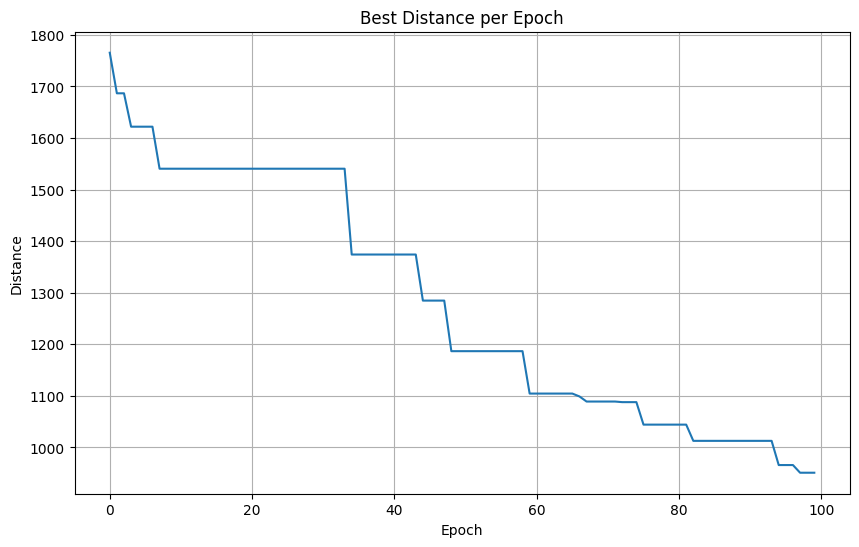

Best route: [20, 24, 18, 5, 23, 11, 9, 6, 19, 1, 2, 14, 15, 17, 4, 13, 21, 12, 16, 10, 0, 8, 7, 3, 22]
Best distance: 951.0248545126442


In [24]:
if __name__ == '__main__':
    # Define the parameters for the algorithm
    n_cities = 25
    n_ants = 50
    epoch = 100
    decay = 0.1
    alpha = 1
    beta = 1
    elitism_factor = 0.5

    # Generate the cities
    cities = generate_cities(n_cities)
    print(f'Cities: {n_cities} , n_ants: {n_ants}, epoch: {epoch}, decay: {decay}, alpha: {alpha}, beta: {beta}, elitism_factor: {elitism_factor}')
    # Solve the traveling salesman problem using the ant colony optimization algorithm
    best_route, best_distance = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)

    # Print the best route and best distance
    print(f'Best route: {best_route}')
    print(f'Best distance: {best_distance}')

Cities: 25 , n_ants: 50, epoch: 100, decay: 0.1, alpha: 5, beta: 1, elitism_factor: 0.1


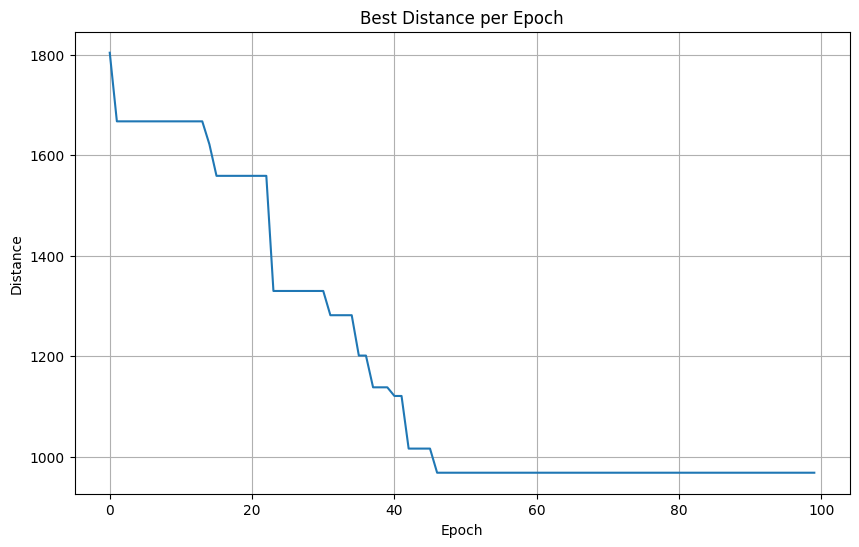

Best route: [20, 22, 3, 7, 8, 0, 10, 21, 13, 4, 17, 15, 12, 16, 14, 2, 9, 6, 19, 1, 11, 23, 5, 18, 24]
Best distance: 968.5744930256676


In [27]:
if __name__ == '__main__':
    # Define the parameters for the algorithm
    n_cities = 25
    n_ants = 50
    epoch = 100
    decay = 0.1
    alpha = 5
    beta = 1
    elitism_factor = 0.1

    # Generate the cities
    cities = generate_cities(n_cities)
    print(f'Cities: {n_cities} , n_ants: {n_ants}, epoch: {epoch}, decay: {decay}, alpha: {alpha}, beta: {beta}, elitism_factor: {elitism_factor}')
    # Solve the traveling salesman problem using the ant colony optimization algorithm
    best_route, best_distance = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)

    # Print the best route and best distance
    print(f'Best route: {best_route}')
    print(f'Best distance: {best_distance}')

Cities: 25 , n_ants: 50, epoch: 100, decay: 0.1, alpha: 1, beta: 5, elitism_factor: 0.1


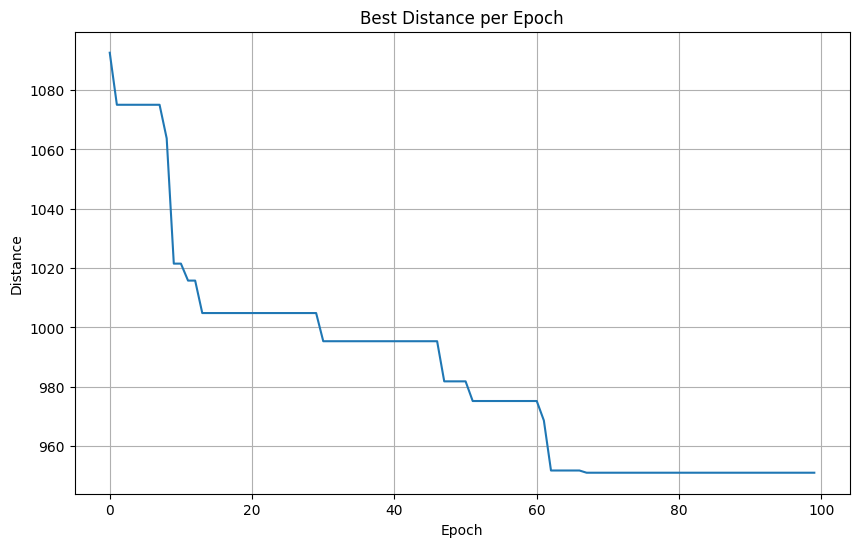

Best route: [22, 3, 7, 8, 0, 10, 16, 12, 21, 13, 4, 17, 15, 14, 2, 1, 19, 6, 9, 11, 23, 5, 18, 24, 20]
Best distance: 951.0248545126441


In [28]:
if __name__ == '__main__':
    # Define the parameters for the algorithm
    n_cities = 25
    n_ants = 50
    epoch = 100
    decay = 0.1
    alpha = 1
    beta = 5
    elitism_factor = 0.1

    # Generate the cities
    cities = generate_cities(n_cities)
    print(f'Cities: {n_cities} , n_ants: {n_ants}, epoch: {epoch}, decay: {decay}, alpha: {alpha}, beta: {beta}, elitism_factor: {elitism_factor}')
    # Solve the traveling salesman problem using the ant colony optimization algorithm
    best_route, best_distance = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)

    # Print the best route and best distance
    print(f'Best route: {best_route}')
    print(f'Best distance: {best_distance}')

n_cities: 50, n_ants: 100, epoch: 200, decay: 0.1, alpha: 1, beta: 1, elitism_factor: 0.3


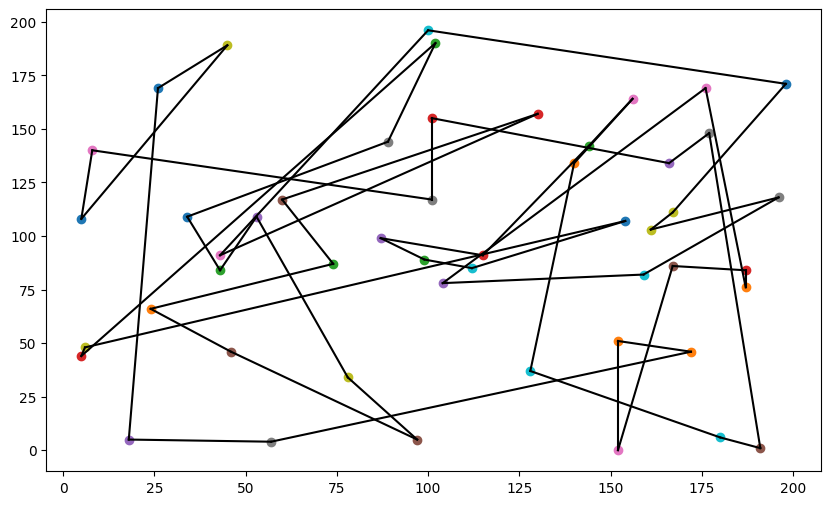

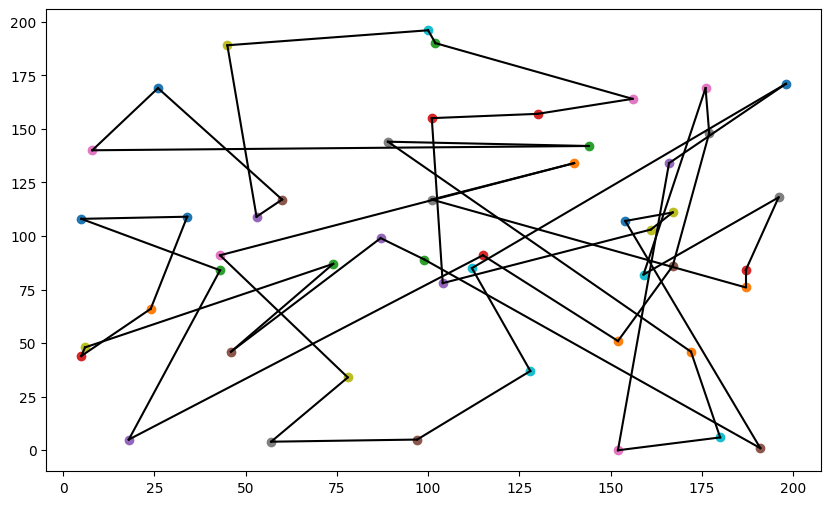

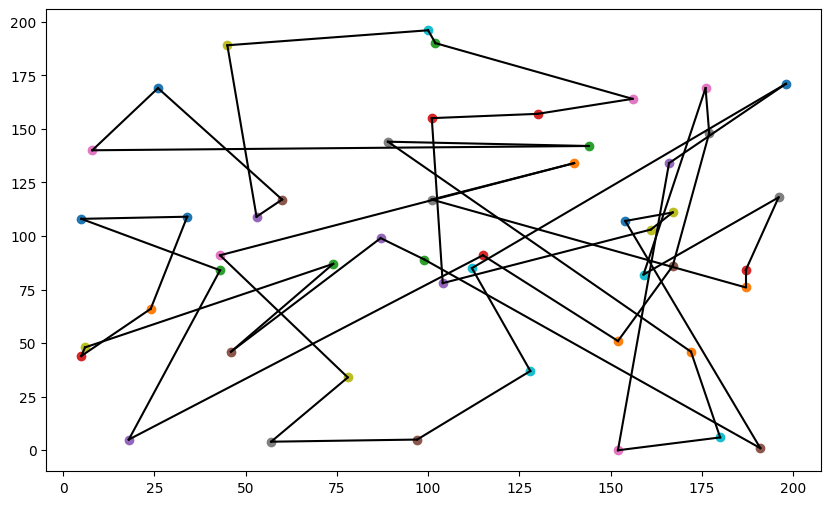

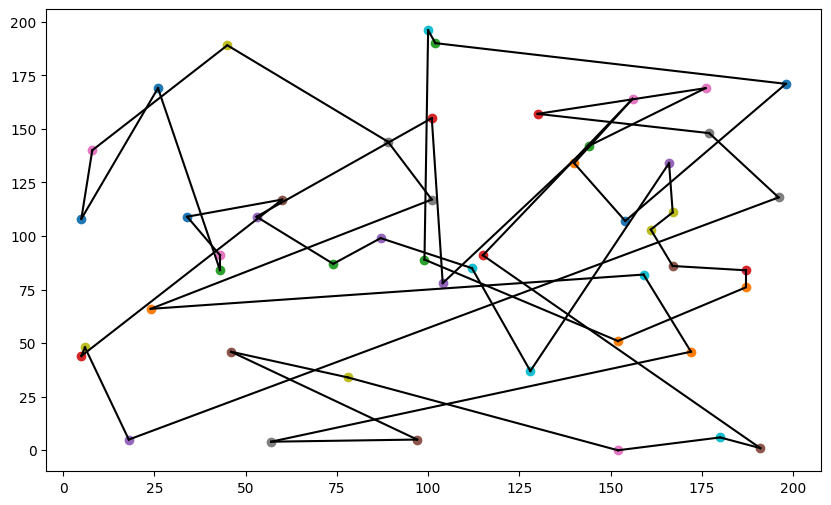

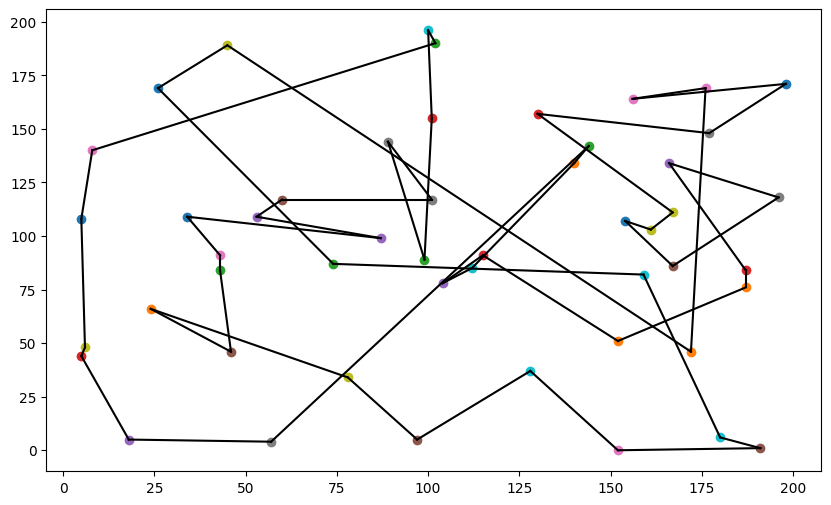

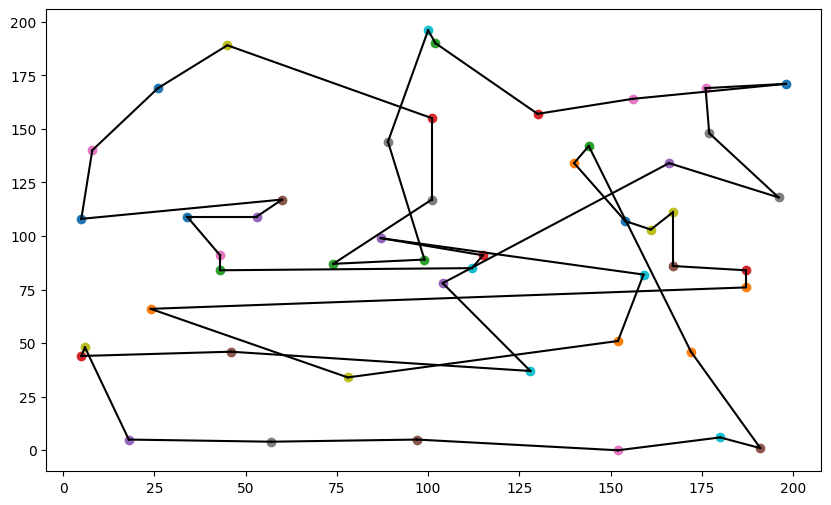

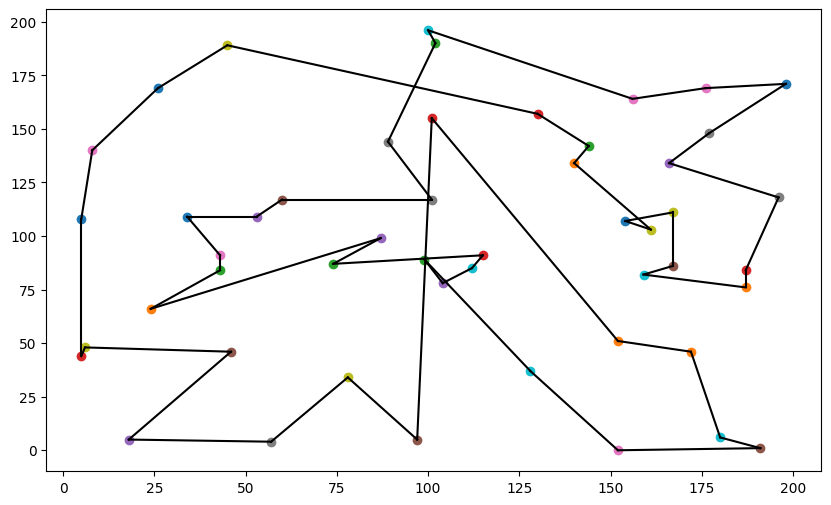

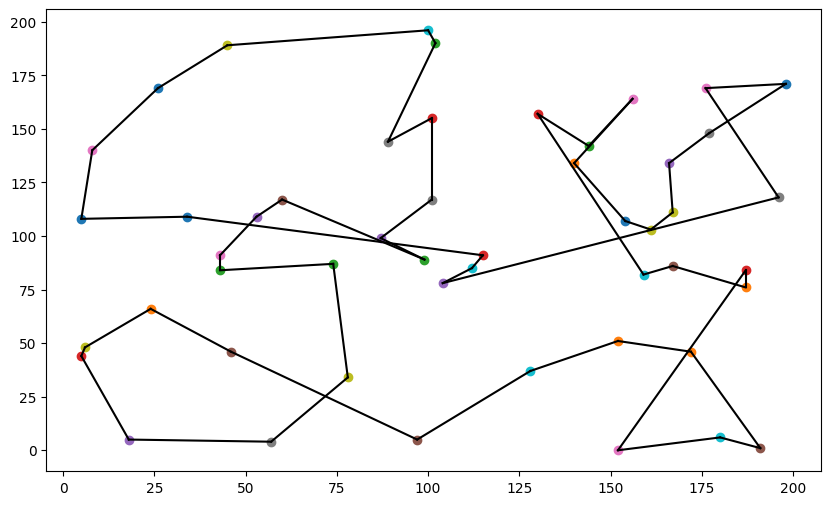

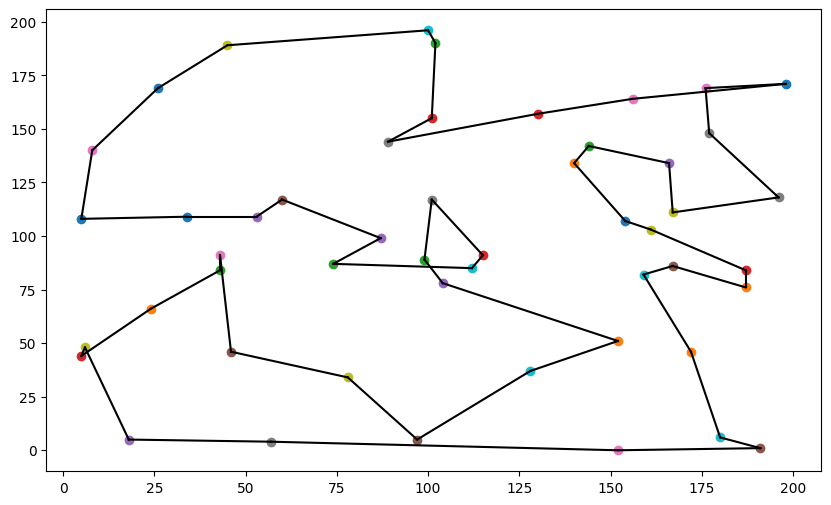

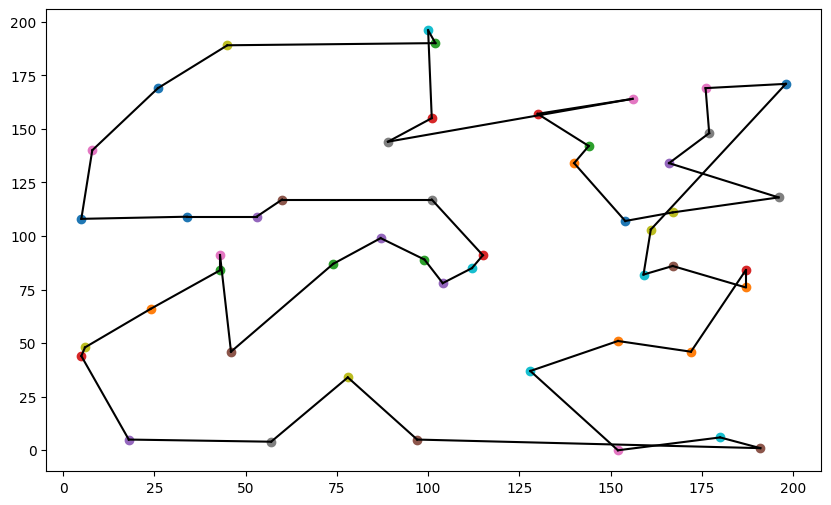

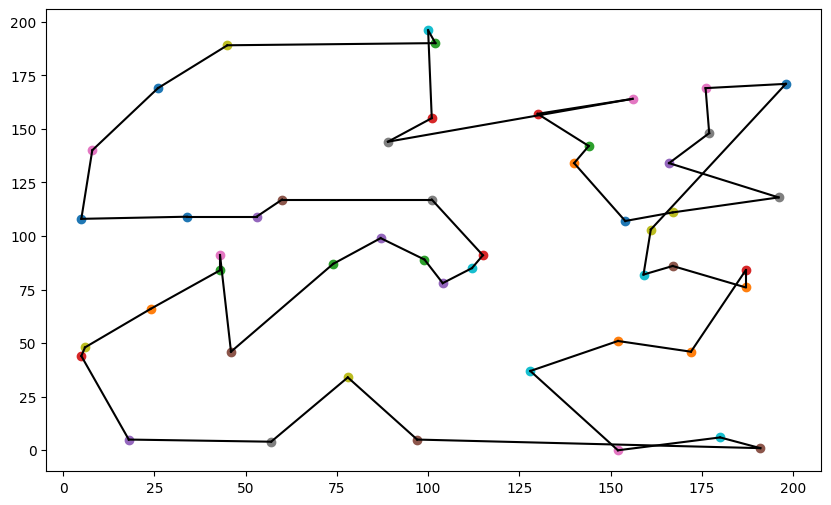

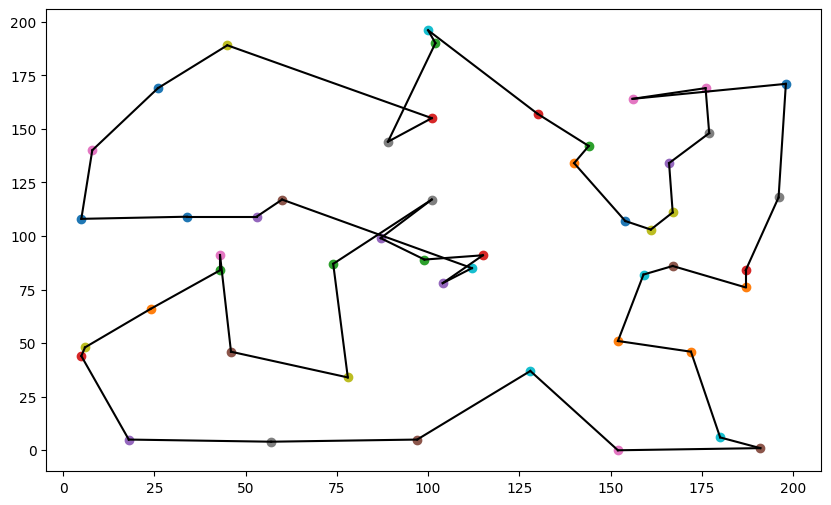

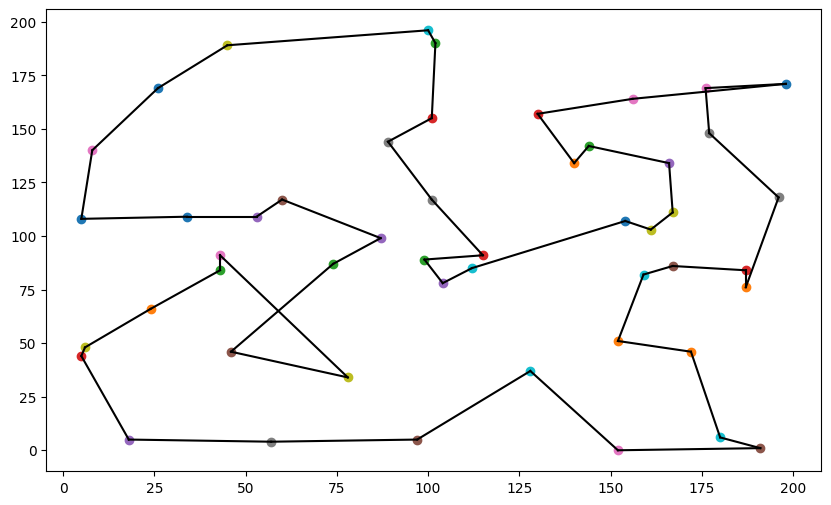

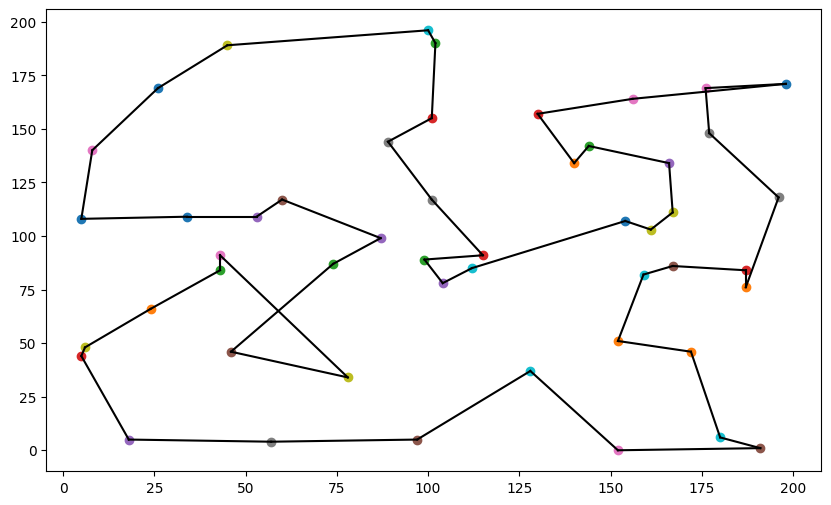

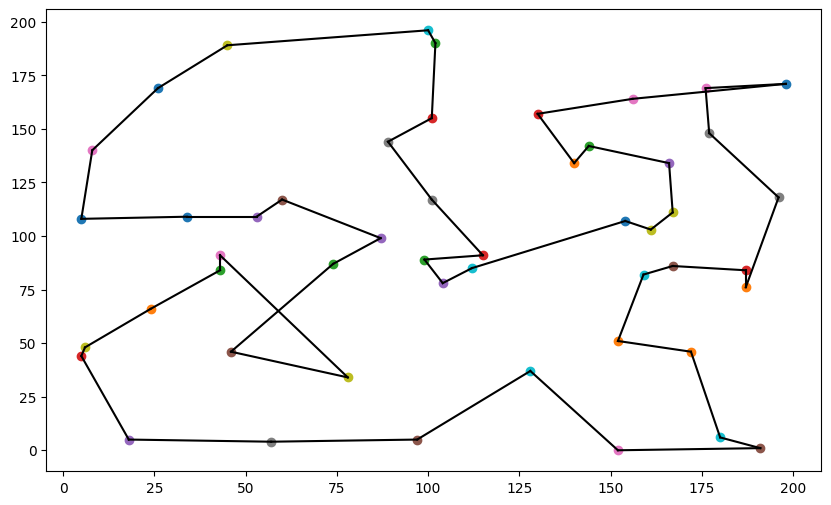

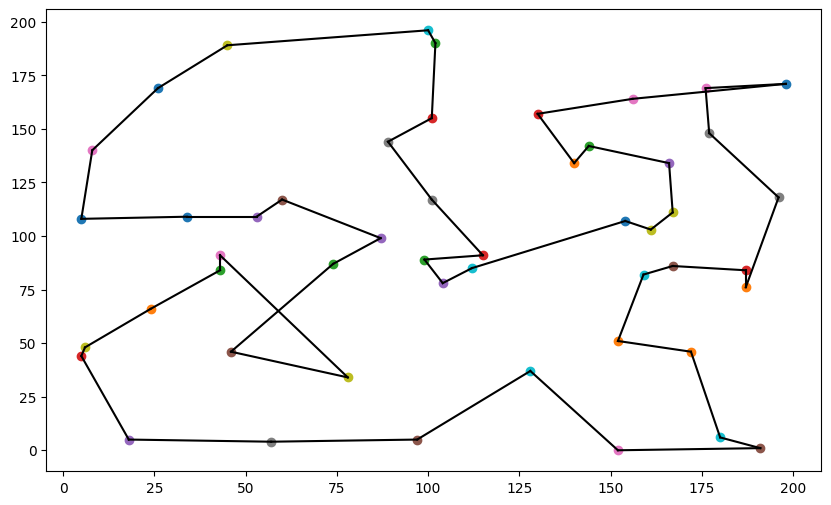

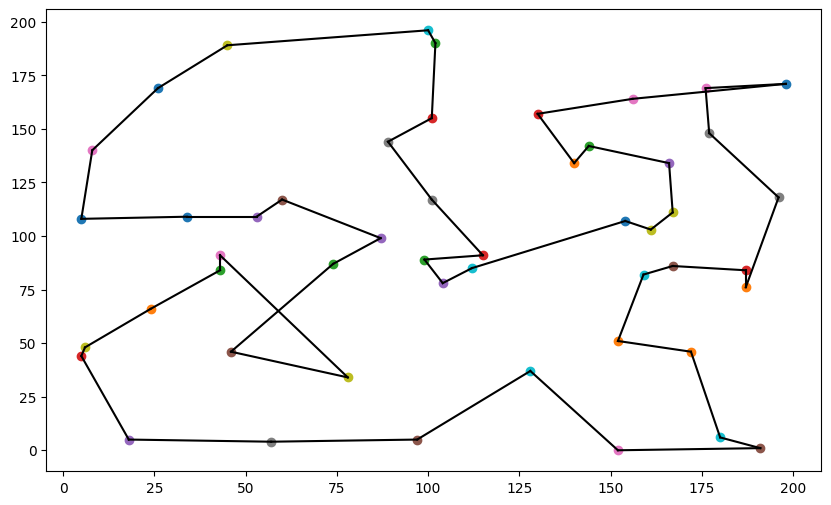

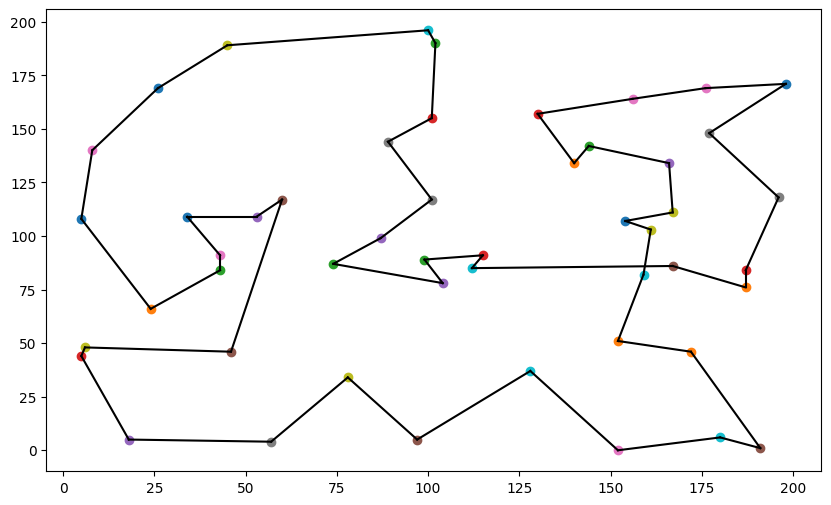

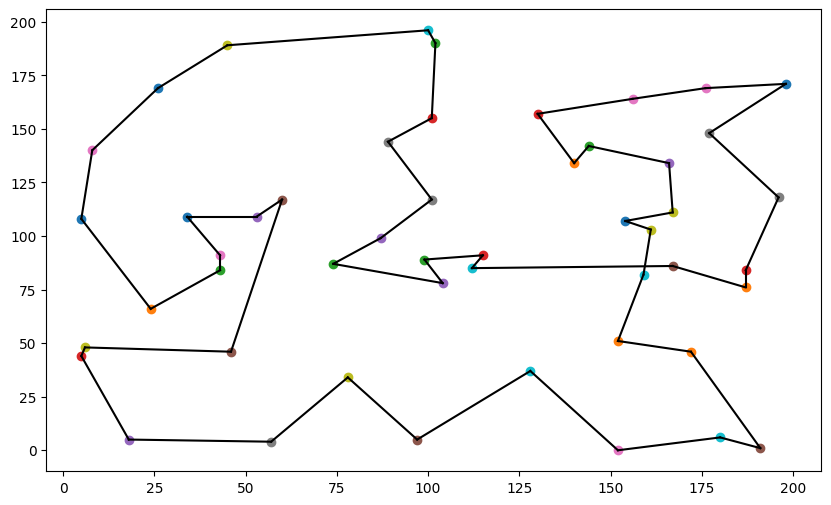

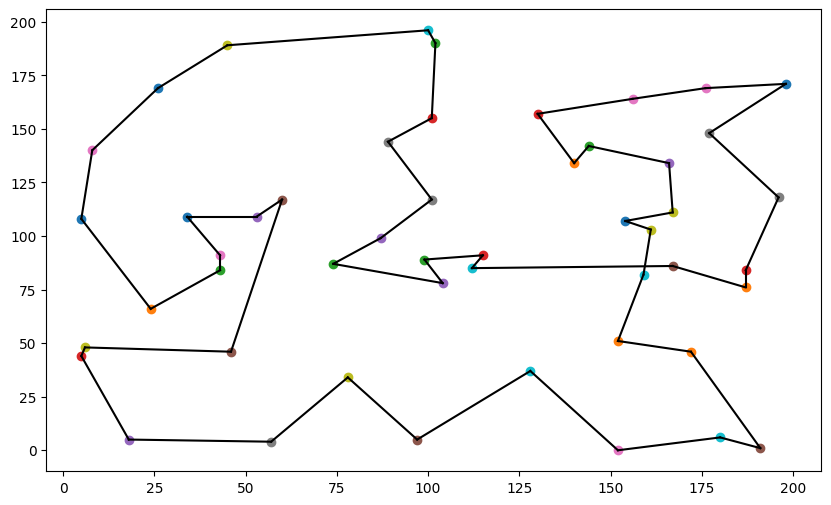

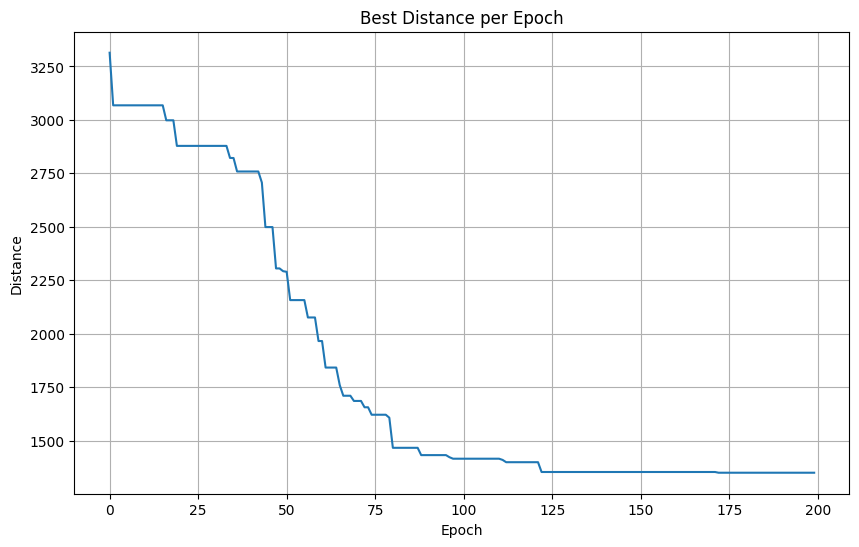

Final solution: Best route = [4, 17, 38, 35, 19, 6, 9, 45, 41, 1, 29, 48, 40, 18, 24, 22, 31, 3, 46, 26, 20, 47, 37, 23, 11, 5, 49, 43, 2, 34, 32, 14, 27, 7, 33, 42, 39, 8, 0, 36, 10, 21, 12, 16, 30, 44, 25, 15, 28, 13], Best distance = 1350.8348532941914


In [35]:
def solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor):
    n_cities = len(cities) 
    pheromones = [] 
    for i in range(n_cities):
        row = [] 
        for j in range(n_cities):
            row.append(1)
        pheromones.append(row) 

    best_route = []
    best_distance = math.inf
    best_distances = []  # A list to keep track of the best distance at each epoch

    for iteration in range(epoch):
        all_routes = []
        for ant in range(n_ants):
            route = create_route(cities, pheromones, alpha, beta) 
            all_routes.append(route)

        for route in all_routes:
            total_distance = calculate_total_distance(route, cities)
            if total_distance < best_distance:
                best_distance = total_distance
                best_route = route

        best_distances.append(best_distance)  # Append best distance of this epoch to list

        pheromones = apply_elitism(all_routes, cities, elitism_factor, pheromones)
        pheromones = update_pheromones(pheromones, best_route, best_distance, decay)


        if (iteration + 1) % 10 == 0:
            plt.figure(figsize=(10, 6))
            for i in cities:
                plt.scatter(*cities[i])
            for i in range(len(best_route)-1):
                plt.plot([cities[best_route[i]][0], cities[best_route[i+1]][0]], 
                         [cities[best_route[i]][1], cities[best_route[i+1]][1]], 'k-')
            plt.plot([cities[best_route[0]][0], cities[best_route[-1]][0]], 
                     [cities[best_route[0]][1], cities[best_route[-1]][1]], 'k-')
            plt.show()

    return best_route, best_distance, best_distances

if __name__ == '__main__':
    n_cities = 50
    n_ants = 100
    epoch = 200
    decay = 0.1
    alpha = 1
    beta = 1
    elitism_factor = 0.3

    cities = generate_cities(n_cities)
    
    print(f"n_cities: {n_cities}, n_ants: {n_ants}, epoch: {epoch}, decay: {decay}, alpha: {alpha}, beta: {beta}, elitism_factor: {elitism_factor}")
    
    best_route, best_distance, best_distances = solve_tsp_ant_colony(cities, n_ants, epoch, decay, alpha, beta, elitism_factor)

    plt.figure(figsize=(10, 6))
    plt.plot(best_distances)
    plt.title('Best Distance per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()

    print(f'Final solution: Best route = {best_route}, Best distance = {best_distance}')

<h3>Refrences</h3>

OOP Solution By Rochak Gupta: https://github.com/rochakgupta/aco-tsp